In [1]:
# Import necessary libraries
import numpy as np                   
import pandas as pd                  
import matplotlib.pyplot as plt      
import seaborn as sns                

# Importing necessary modules from scikit-learn
import sklearn
from sklearn.linear_model import LinearRegression             # For creating a linear regression model
from sklearn.feature_selection import RFE                     # For feature selection
from sklearn.model_selection import train_test_split          # To split the dataset into training and testing sets
from sklearn.preprocessing import MinMaxScaler                # For normalizing 
from sklearn.metrics import r2_score, mean_squared_error      # For model evaluation metrics

# Importing statsmodels and additional libraries for multicollinearity analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # To calculate VIF
import statsmodels.api as sm                                              # For statistical modeling and summary

# Suppress warnings (to avoid clutter in output)
import warnings
warnings.filterwarnings('ignore')

# Ensures that all plots appear in the notebook itself
%matplotlib inline

# The above libraries are essential for data analysis, machine learning model building,
# evaluation, and feature selection. They help streamline the process of creating
# and fine-tuning a multiple linear regression model.

### 1. Data Understanding, Preparing and EDA

In [2]:
# Reading the dataset
bike = pd.read_csv('C:/Users/Satyam Singh/Downloads/day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape

(730, 16)

##### There are 730 Rows and 16 columns

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Summarising the datasets
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Checking for duplicates
len(bike[bike.duplicated()])

0

##### No Duplicate Rows present in the data set

In [7]:
# Checking for Null Values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### No Null values present in any of the columns.

In [8]:
# Checking for Unique Values in each column
bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

##### Above we can see that "instant" and "dteday" columns have all unique values. Before taking the decision on dropping these columns let's look at data dictionary.

#### Metadata and Definition:

**instant**: As per Data Dicitionary this record indext. This seems like a surrogate key, unique for each record and therefore it can be dropped.

**dteday**: This column captures the date. It is a redundant column because we do have month, day of the week, year and holiday data in seperate columns, therefore this can be dropped too.

**season**: This categorical variable captures the sseason (1:spring, 2:summer, 3:fall, 4:winter). Need to create dummy variable depicting actual season names out of the values present in this column.

**yr**: year (0: 2018, 1:2019) Again a categorical attribute where 0 denotes year 2018 and 1 means 2019. 

**mnth**: It records the month. Categotrical variable (1 to 12). We will create another dummy variable depicting actual month names based on the values of this column.

**holiday**: It shows whether the particular day is Holiday or not. 1 means Holiday, 0 No Holiday.

**weekday**: Day of the week (0 to 6). A dummy variable shall be created for depicting actual week names mapped with the values present in this column

**workingday**: If day is neither weekend nor holiday is 1, otherwise is 0. This variable is an extract of holiday and weekday.

**weathersit**: This is again a categorical variable containing below mentioned values:

  **1**: Clear, Few clouds, Partly cloudy, Partly cloudy- Can be converted to Clear to Partly Cloudy

  **2**: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist- Can be converted to Misty & Cloudy

  **3**: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds- Can be converted to light   rain   and light snow.

  **4**: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog- Can be converted to heavy rain and heavy snow.

**temp**: Temperature in Celsius

**atemp**: Feeling temperature in Celsius

**hum**: Humidity

**windspeed**: Wind Speed

**casual**: Number of Casual users (Unregistered customers)

**registered**: Number of registered users

**cnt**: Number of total rental bikes including both casual and registered. This is our Target Variable. This column is sum of casual and registered and hence redundant but let's decide later to drop it or to retain it.



In [9]:
# Dropping "instant" and "dteday" as these are redundant columns
bike.drop(['instant','dteday'], axis=1, inplace=True)

In [10]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Summarisng the dataset
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Data Summary and observations:

**season**: The season column has four values, representing each of the four seasons, and no issues were found.

**Year (yr)**: The data covers exactly two years.

**Month (mnth)**: There are 12 months, and no anomalies were noticed.

**Holiday**: This column shows 1 for holidays and 0 for non-holidays. There are no irregularities in this boolean column.

**Weekday**: There are 7 values (0 to 6) for weekdays, with 0 starting on Sunday, as expected.

**Weather Situation (weathersit)**: The data dictionary mentions four weather conditions, but the dataset only contains values for the first three, missing the fourth.

**Temperature (temp)**: The temperature ranges from 2.4°C to 35.3°C, with a median of 20.5°C.

**Humidity (hum)**: The humidity levels are generally above 50%, indicating relatively humid weather.

**Windspeed**: The windspeed shows minimal variation, suggesting generally calm winds.

**Casual Users**: There's a higher variation in the number of casual users compared to registered users.

**Registered Users**: The numbers for registered users align more closely with the trend of the target variable (total rentals).

#### Data Preparation: Mapping the categorical variableswith their actual names:


In [12]:
bike['weathersit']  = bike['weathersit'].map({1:'Clear to Partly Cloudy', 2:'Misty and Cloudy', 3:'Light Rain or Light Snow', 4: 'Heavy Rain or Heavy Snow'})

In [13]:
bike['season']= bike['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [14]:
bike['mnth'] = bike['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6: 'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10: 'Oct', 11 :'Nov', 12 :'Dec'})

In [15]:
bike['weekday'] = bike['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

In [16]:
bike.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,Jan,0,Sat,0,Misty and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,Jan,0,Sun,0,Misty and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,Jan,0,Mon,1,Clear to Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,Jan,0,Tue,1,Clear to Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,Jan,0,Wed,1,Clear to Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Exploratory Data Analysis

#### Univariate Analysis

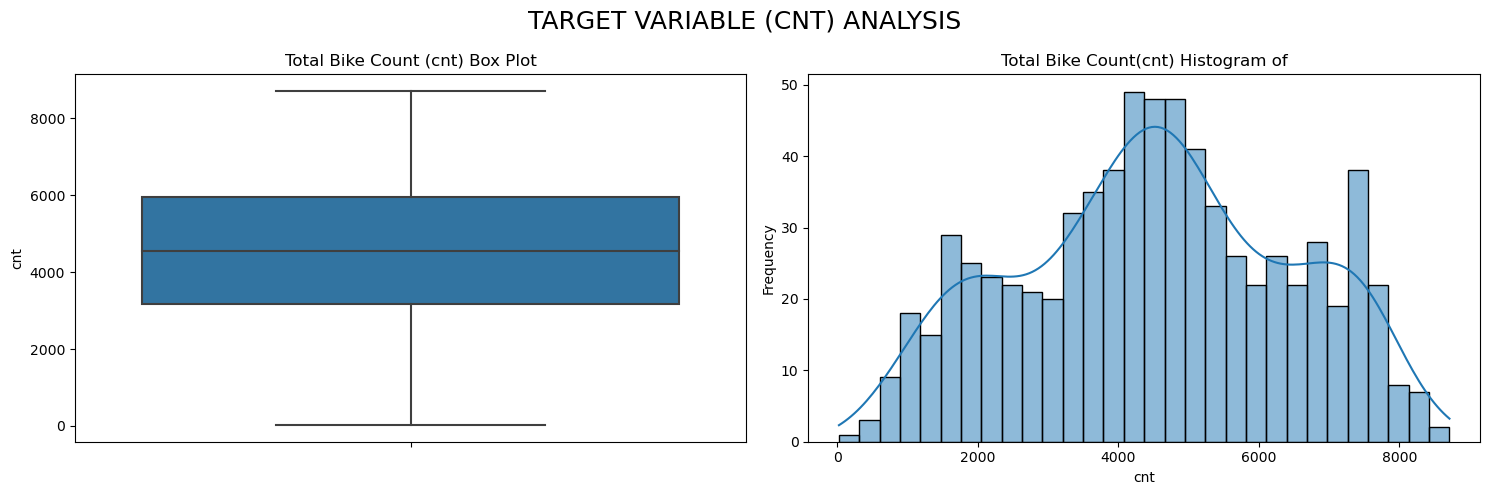

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Target Variable (cnt) Analysis'.upper(), fontsize=18)

sns.boxplot(y=bike['cnt'], ax=axes[0])
axes[0].set_title('Total Bike Count (cnt) Box Plot')
axes[0].set_ylabel('cnt')

sns.histplot(bike['cnt'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('Total Bike Count(cnt) Histogram of')
axes[1].set_xlabel('cnt')
axes[1].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

##### Observations:
**Inference from Boxplot**:

1. The first quartile (Q1) is around 3000, meaning 25% of the data points are below this value.
2. The third quartile (Q3) is around 6000, indicating 75% of the data points are below this value.
3. The Interquartile Range (IQR), which is the difference between Q3 and Q1, is about 3000, showing the spread of the middle 50% of the data.
4. The median is about 4500, meaning half of the data points are below and half are above this value.

**Inference from histogram**:

1. The target variable (cnt) has a nearly normal distribution, meaning the values are spread evenly around the average, forming a bell-shaped curve.
2. There are two noticeable peaks on either side of the distribution, suggesting two common value ranges where the data tends to cluster.

#### Continuous Independent Variables
**Pairplots of Numerical Continous Variables**:

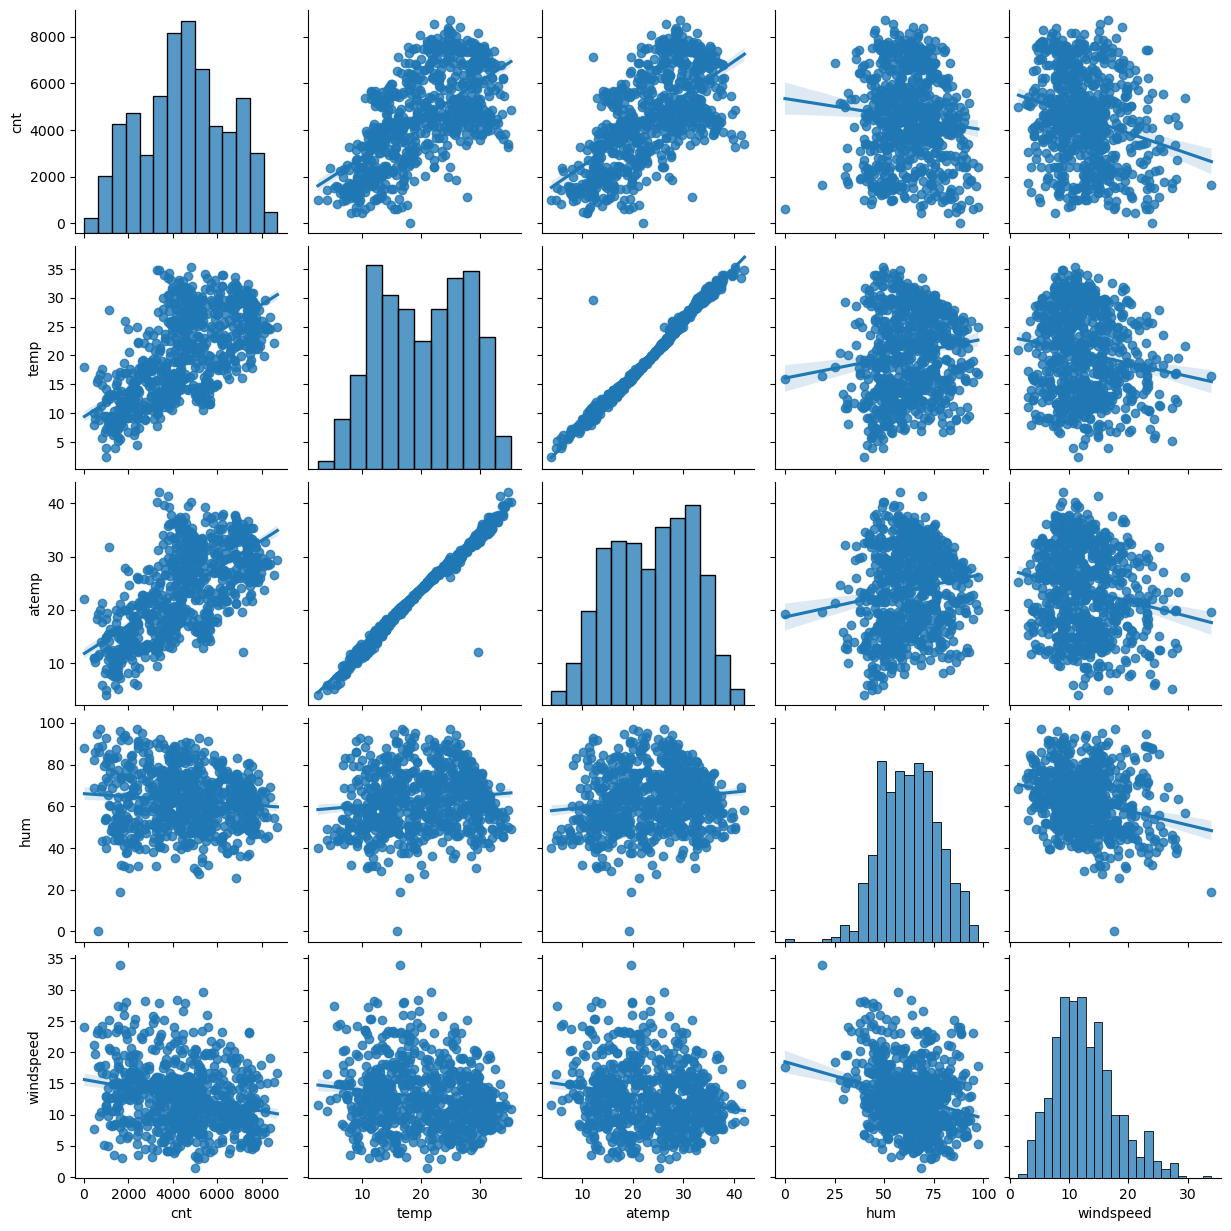

In [18]:
numerical_variabels=['cnt', 'temp', 'atemp', 'hum','windspeed']
sns.pairplot(data=bike,vars=numerical_variabels, kind="reg")
plt.show()

**Observations**:

1. It's evident that there is a strong linear relationship between temp, atemp, and the count variable.
2. Additionally, temp and atemp show a high degree of correlation with each other.

In [19]:
#Selecting continuous variables:
#list cont_var is created to store the names of continuous variables.
#function bike.select_dtypes(exclude='object').columns is used to select all numerical columns from the DataFrame, excluding those of type 'object'.
#condition bike[i].nunique() > 2 ensures that only numerical columns with more than two unique values (i.e., continuous variables) are selected, excluding binary or categorical variables.
#variable cnt (the target variable) is excluded from the list of continuous variables by the condition i != 'cnt'.

cont_var = [i for i in bike.select_dtypes(exclude = 'object') if bike[i].nunique() > 2 and i != 'cnt']

In [20]:

cont_var

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

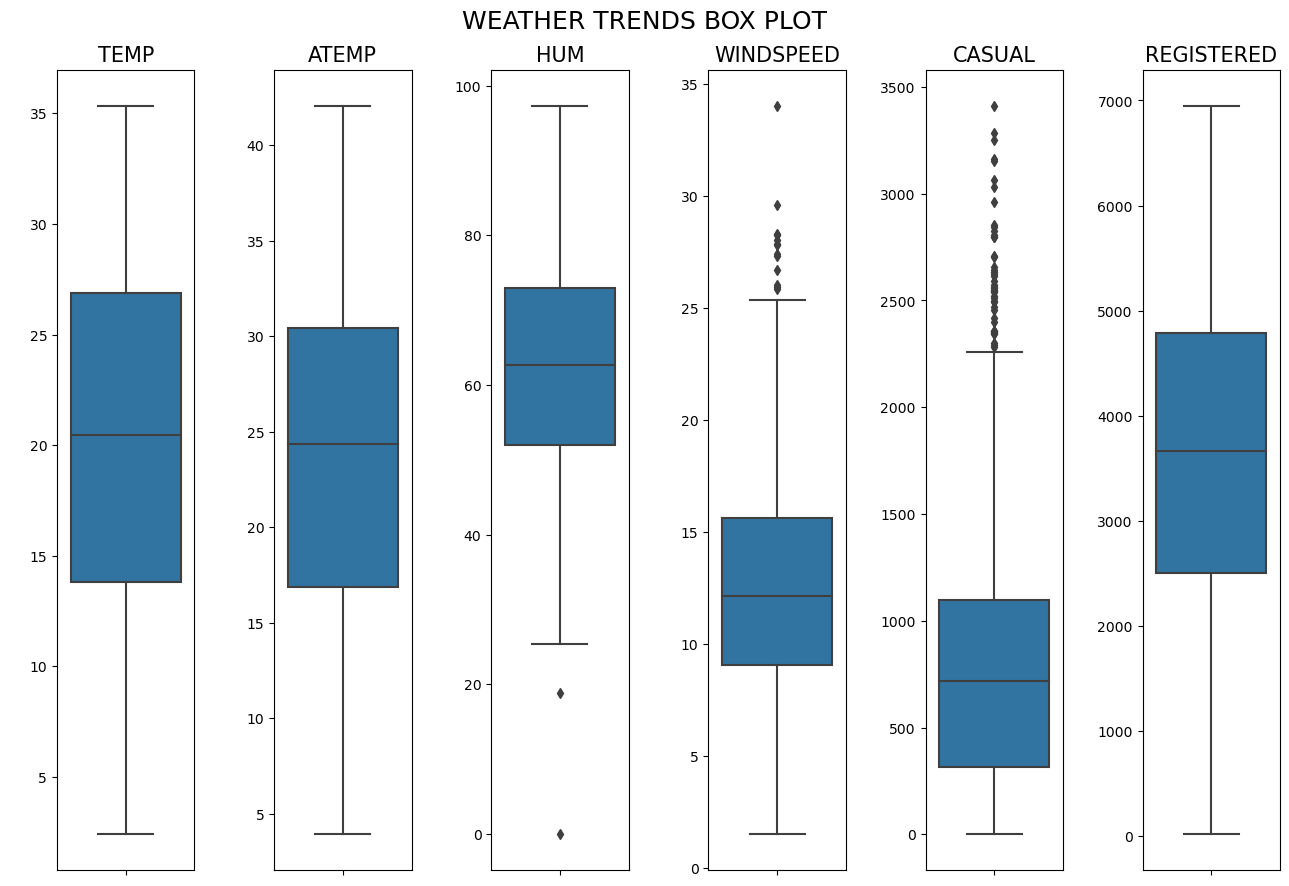

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=len(cont_var), figsize=(13, 9))

plt.suptitle('Weather Trends Box Plot'.upper(), fontsize=18)

for i in range(len(cont_var)):
    sns.boxplot(y=bike[cont_var[i]], ax=ax[i])

    ax[i].set_title(f'{cont_var[i].upper()}', fontsize=15)

    ax[i].set_ylabel(' ')

plt.tight_layout()

plt.show()

##### Observations:

1. The first and third quartiles of temp range from 14 to 27, with a median of 21.
2. The first and third quartiles of atemp range from 17 to 31, with a median of 24.
3. Outliers are observed in humidity, windspeed, and casual.

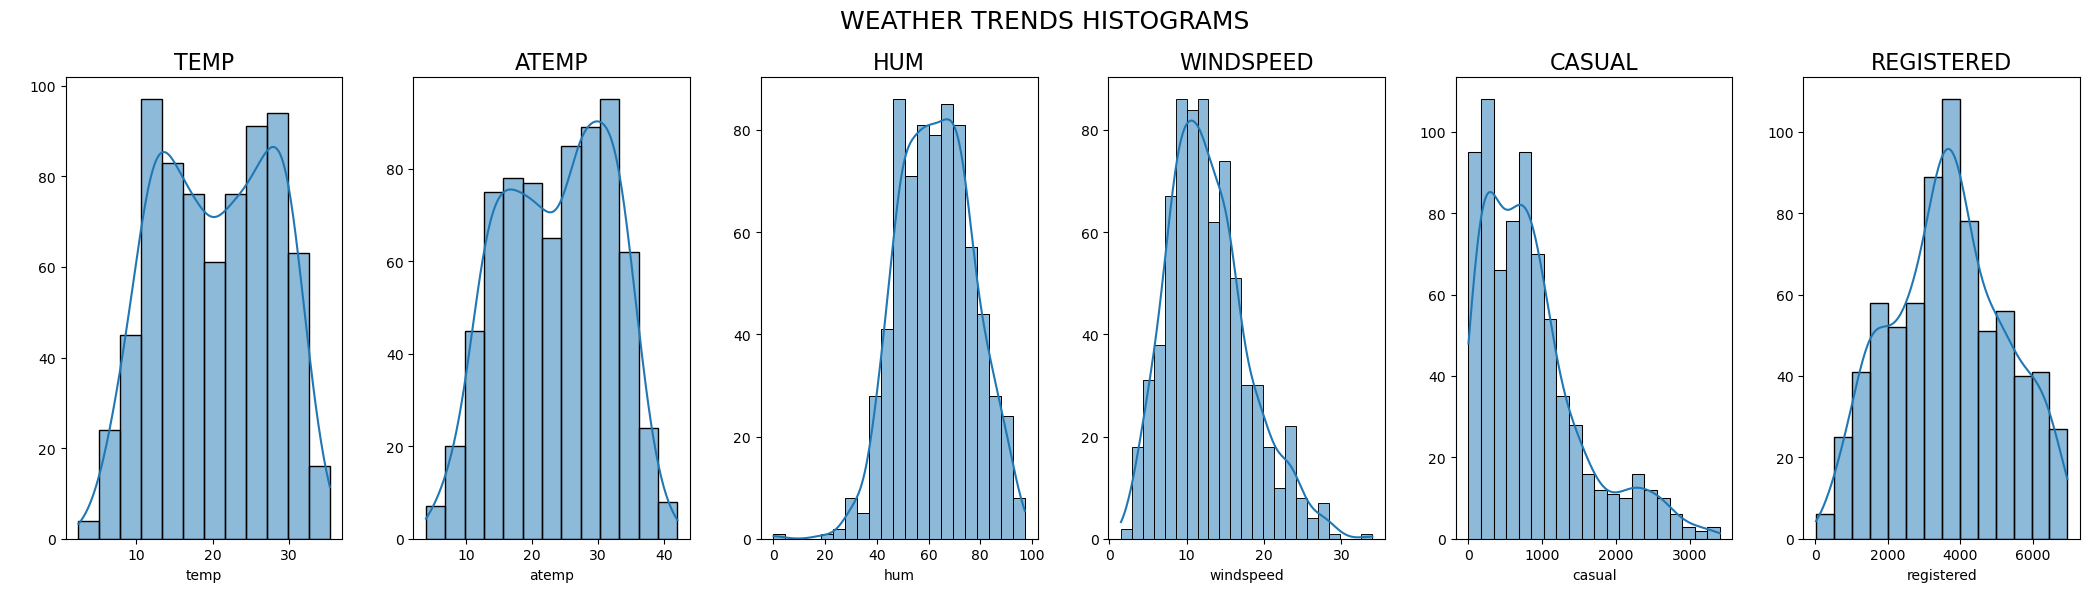

In [22]:

fig, ax = plt.subplots(nrows=1, ncols=len(cont_var), figsize=(21, 6))

plt.suptitle('Weather Trends Histograms'.upper(), fontsize=18)

for i in range(len(cont_var)):
    sns.histplot(bike[cont_var[i]], kde=True, ax=ax[i])

    ax[i].set_title(f'{cont_var[i].upper()}', fontsize=16)

    ax[i].set_ylabel(' ')

plt.tight_layout()

plt.show()

##### Observations:

1. The Histograms tells us that both temp and atemp display double peaks.
2. Humidity is left-skewed, while windspeed is right-skewed.
3. Casual has a pronounced right skew.
4. gistered follows a pattern similar to the target variable, but the peaks on both sides are smoother.

#### Categorical Independent Variables

In [23]:
cat_var = [i for i in bike.select_dtypes(include='object').columns]

cat_var.extend([i for i in bike.columns if bike[i].nunique() == 2])

In [24]:
# List of categorical variables
cat_var

['season', 'mnth', 'weekday', 'weathersit', 'yr', 'holiday', 'workingday']

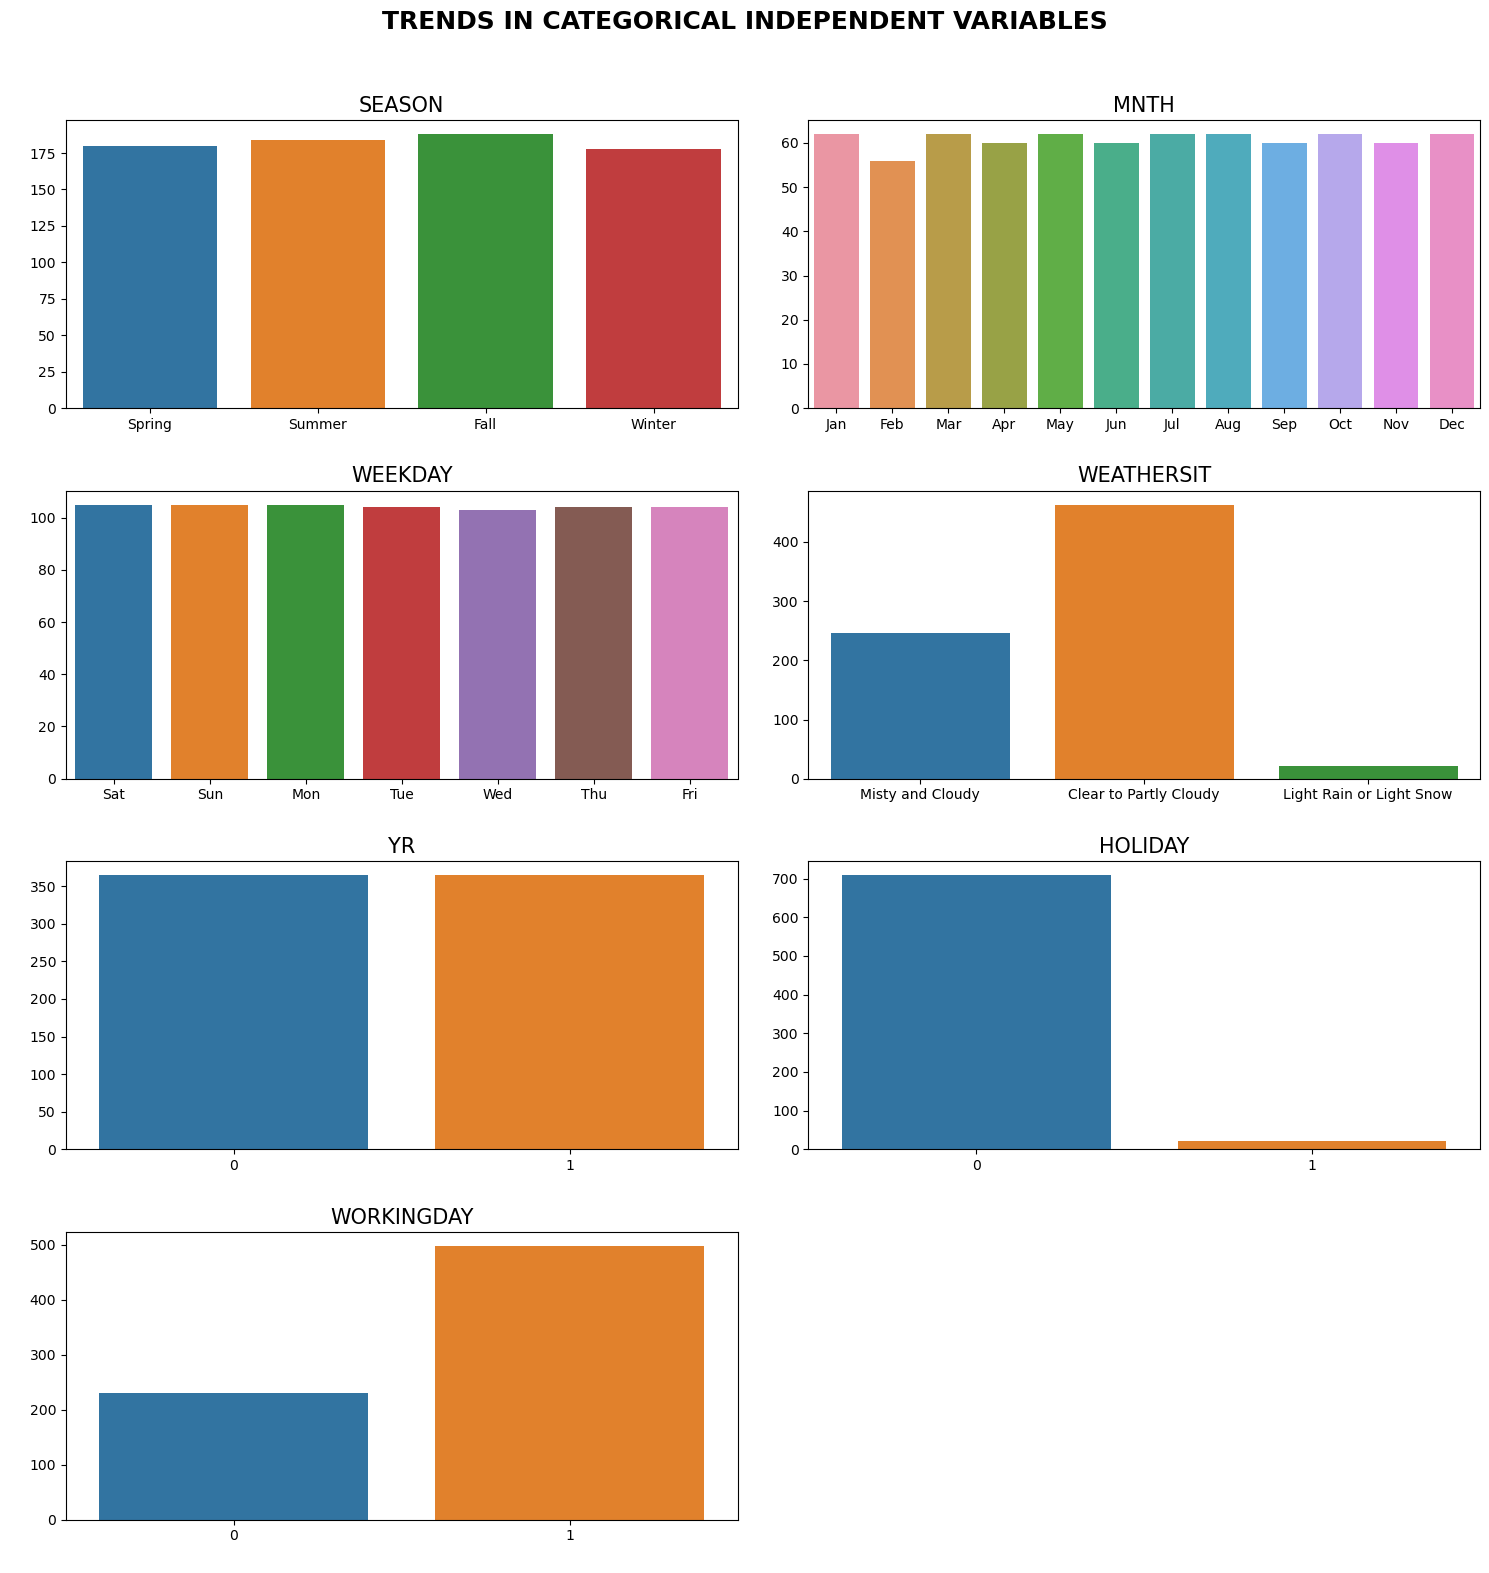

In [25]:

num_rows = (len(cat_var)//2) + 1 if len(cat_var) % 2 == 1 else len(cat_var) // 2
num_cols = 2

fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 16))

plt.suptitle('TRENDS IN CATEGORICAL INDEPENDENT VARIABLES', fontsize=18, fontweight='bold')

k = 0

for i in range(num_rows):
    for j in range(num_cols):
        if k < len(cat_var):
            sns.countplot(x=bike[cat_var[k]], ax=ax[i, j])

            ax[i, j].set_title(f'{cat_var[k].upper()}', fontsize=15)

            ax[i, j].set_ylabel(' ')

            ax[i, j].set_xlabel(' ')

            k += 1
        else:
            fig.delaxes(ax[i, j])

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

##### Observations:

1. The dataset includes only three weather types, with no instances of heavy rain or snow. Most days in both years experienced clear or partly cloudy conditions.
2. Fall is identified as the longest season, followed by summer, then spring. Winter is the shortest season.

#### Bivariate Analysis

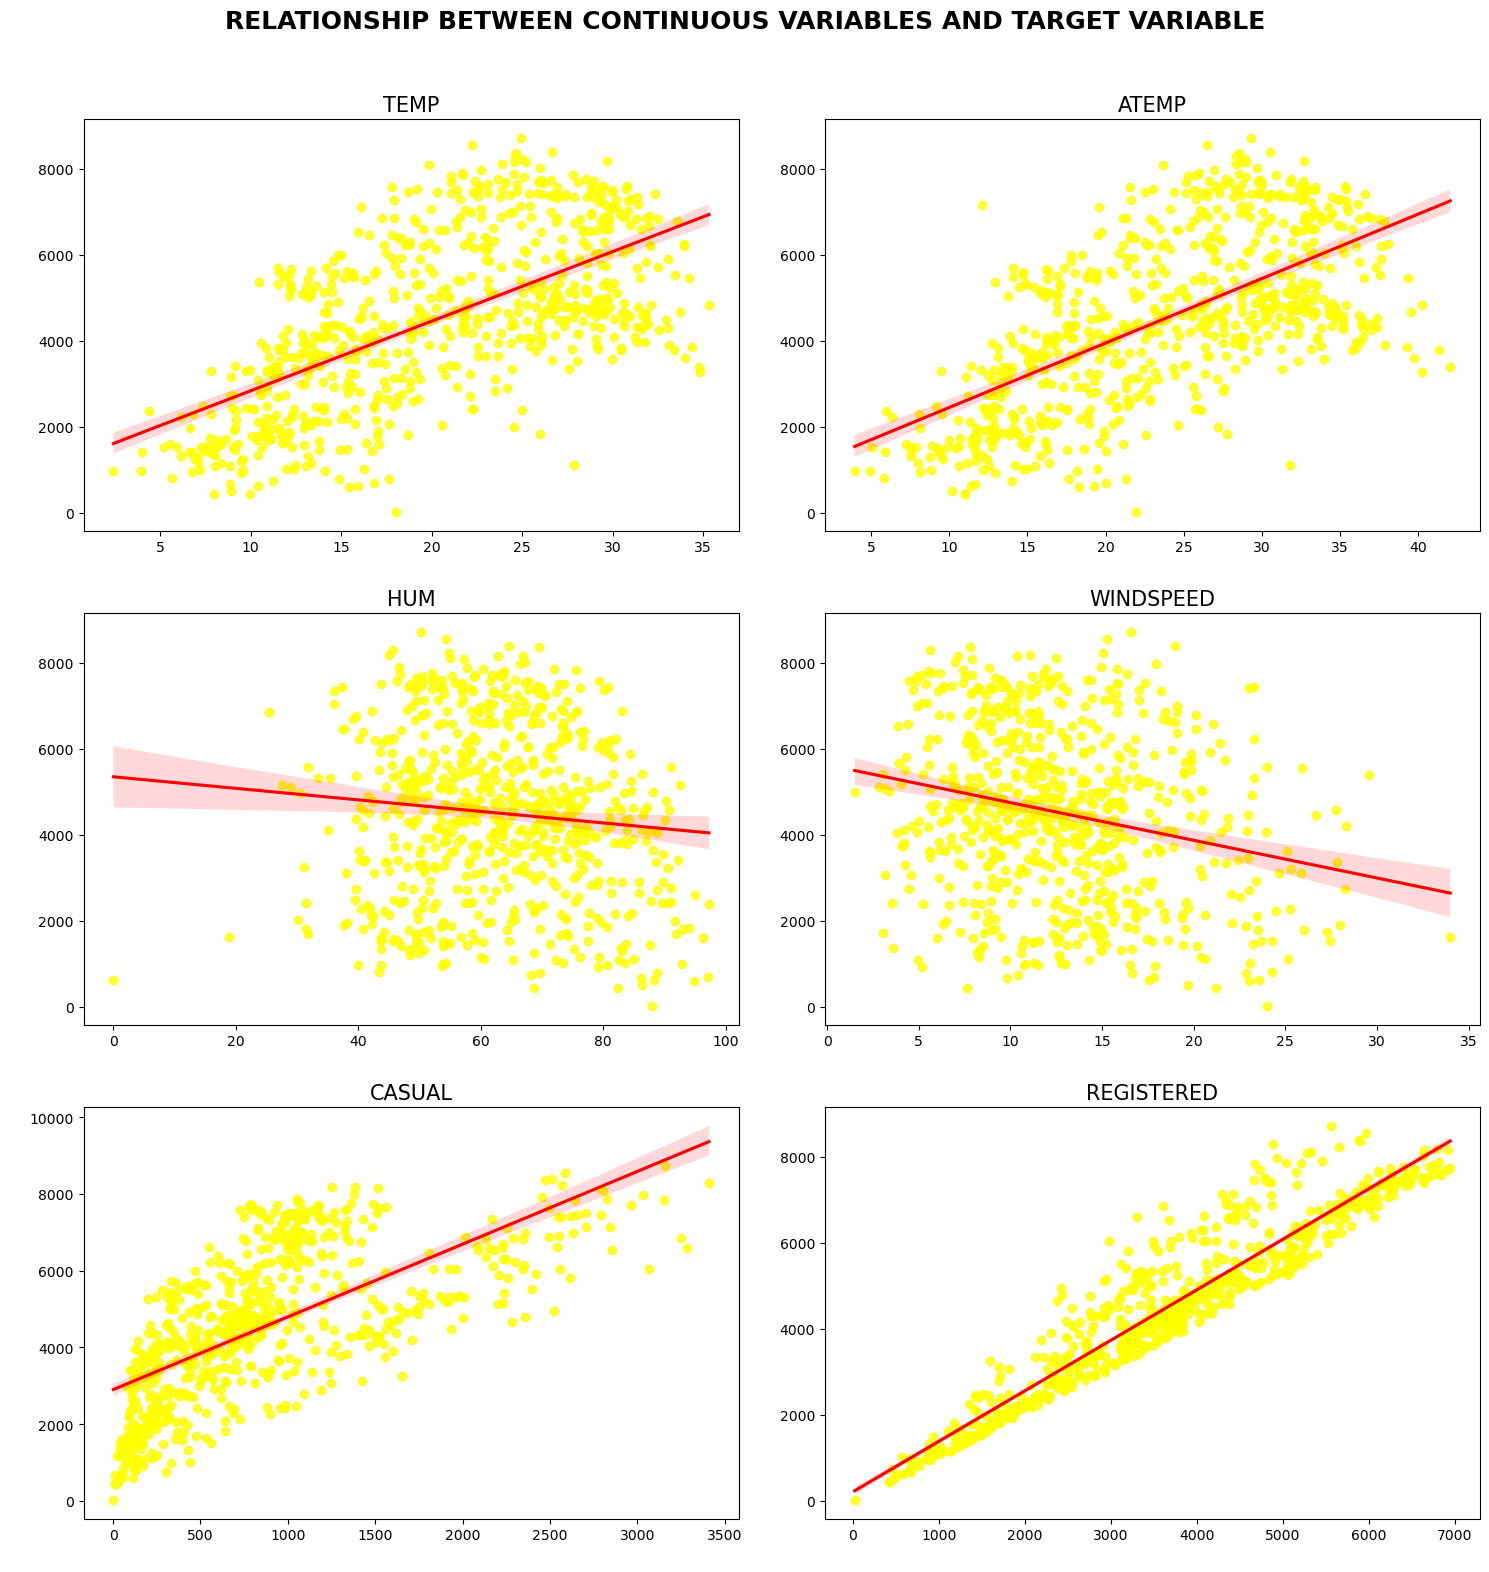

In [26]:
#Determine the Number of Rows and Columns for Layout:
#num_rows: The number of rows is determined by the length of cont_var.
#If the length of cont_var is odd, an extra row is added to ensure all variables fit evenly.
#If the length is even, it is divided by 2 to distribute the variables equally across the rows.
#num_cols: Set to 2 columns for a vertical arrangement.
num_rows = (len(cont_var)//2) + 1 if len(cont_var) % 2 == 1 else len(cont_var) // 2
num_cols = 2

fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 16))

plt.suptitle('Relationship between continuous variables and target variable'.upper(), fontsize=18, fontweight='bold')

k = 0

for i in range(num_rows):
    for j in range(num_cols):
        if k < len(cont_var):
            sns.regplot(x=bike[cont_var[k]], y=bike['cnt'], ax=ax[i,j],
                        scatter_kws={'color':'yellow'}, line_kws={'color':'red'})

            ax[i, j].set_title(f'{cont_var[k].upper()}', fontsize=15)
            ax[i, j].set_ylabel(' ')
            ax[i, j].set_xlabel(' ')
            k += 1
            
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

##### Observations:

1. Bike demand exhibits a directly proportional relationship with both temp and atemp.
2. There is an inverse relationship between bike demand and both humidity and windspeed.
3. Bike demand is directly related to the number of casual and registered users.
4. The demand for bikes is strongly influenced by the number of registered users.

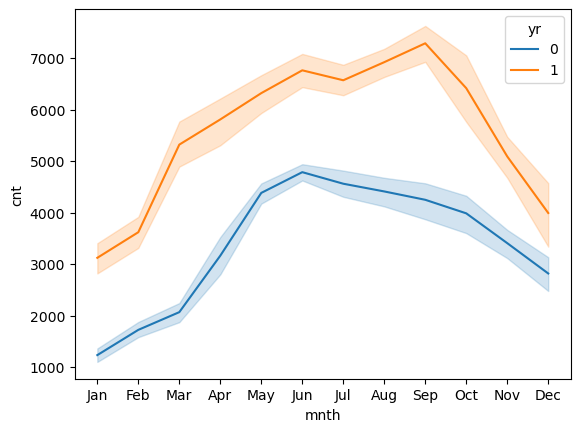

In [27]:
# Analysing Month with Count
sns.lineplot(x = "mnth", y = "cnt", data=bike,hue = "yr")
plt.show()

##### Observations:

The line graph shows that the target variable cnt rose from 2018 to 2019. Bike demand is particularly high from May to October in both years.

In [28]:
#### Correlation Analysis

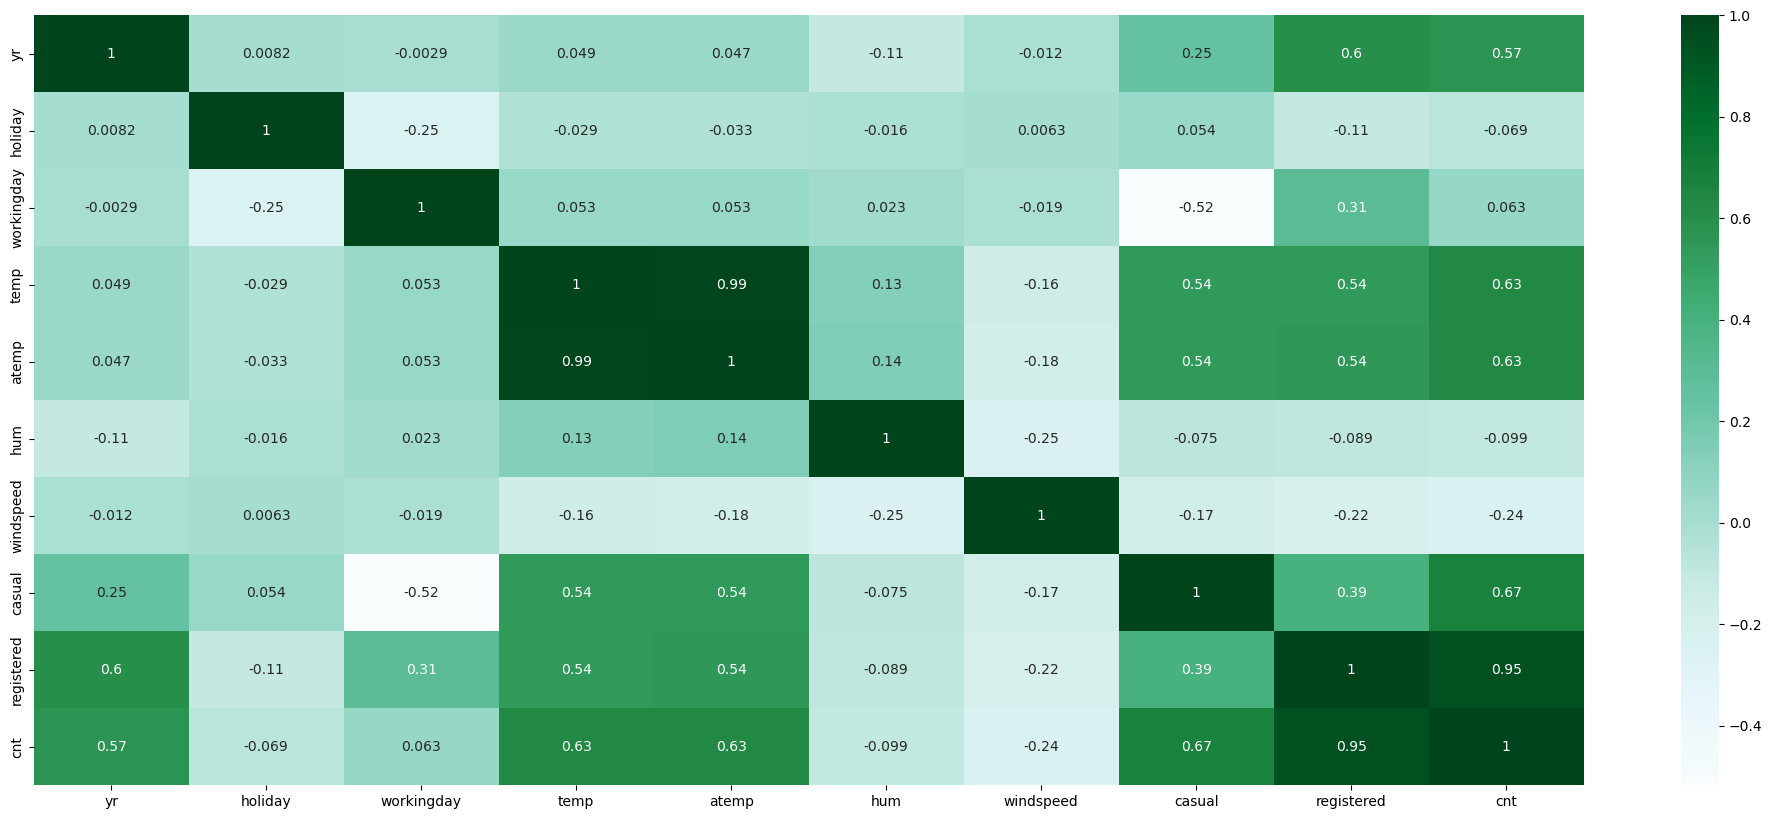

In [29]:
# Numerical Columns
numeric_columns = bike.select_dtypes(include=['float64', 'int64'])

# Correlation Matrix Calculation
corr_matrix = numeric_columns.corr()

# Heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix, cmap='BuGn', annot=True)
plt.show()

##### Observations from the Heatmap:

1. Since cnt is the total of casual and registered rentals, we can conclude from the heatmap that casual and registered are strongly correlated with cnt.
2. There is a negative correlation between holiday, humidity, and windspeed.
3. The independent variables temp and atemp are highly correlated (0.99), indicating that one might be derived from the other. Therefore, one of them can be eliminated. We will use VIF and p-values to determine which one to drop.

In [30]:
# Dropping casual and Registed as these are redundant.

bike.drop(['casual','registered'],axis=1,inplace=True)

In [31]:
bike.shape

(730, 12)

In [32]:
# function to create barplot related to categorical columns

def plot_bar_graphs(column):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=bike, errorbar=None)
    plt.title(f'Bar Plot of {column} vs cnt')
    plt.xlabel(column)
    plt.ylabel('Total Count')

    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=bike, hue='yr', errorbar=None)
    plt.title(f'Bar Plot of {column} vs cnt (2018 vs 2019)')
    plt.xlabel(column)
    plt.ylabel('Total Count')

    handles, labels = plt.gca().get_legend_handles_labels()
    labels = ['2018', '2019']  # Update labels for clarity
    plt.legend(handles=handles, labels=labels, title='Year')

    plt.tight_layout()
    plt.show()

In [33]:
#list of categorical variables
cat_var

['season', 'mnth', 'weekday', 'weathersit', 'yr', 'holiday', 'workingday']

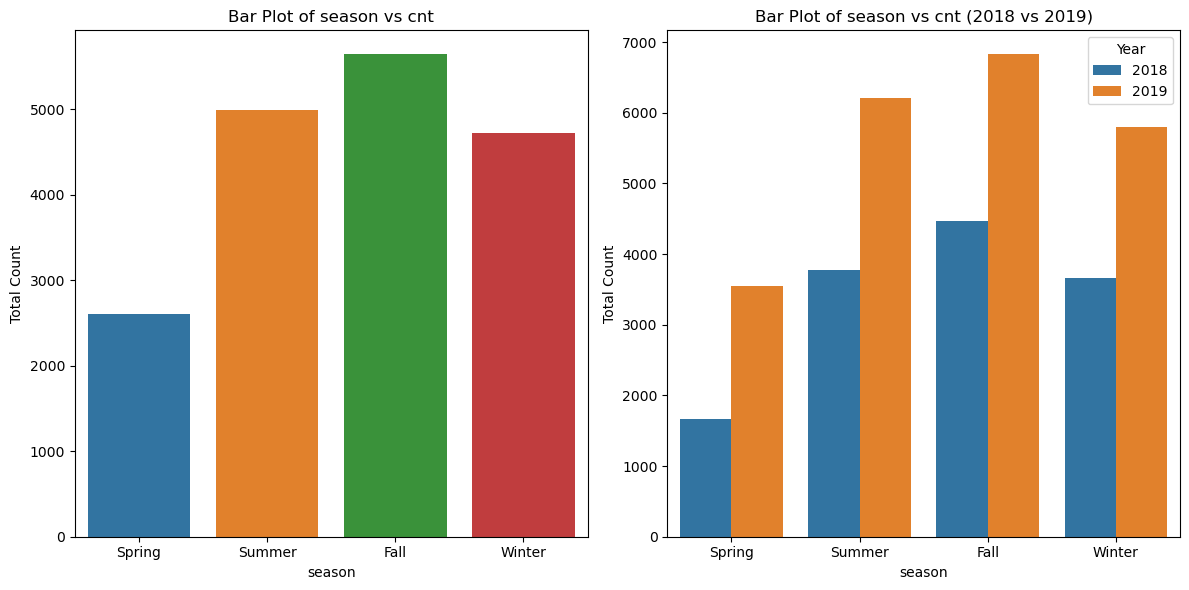

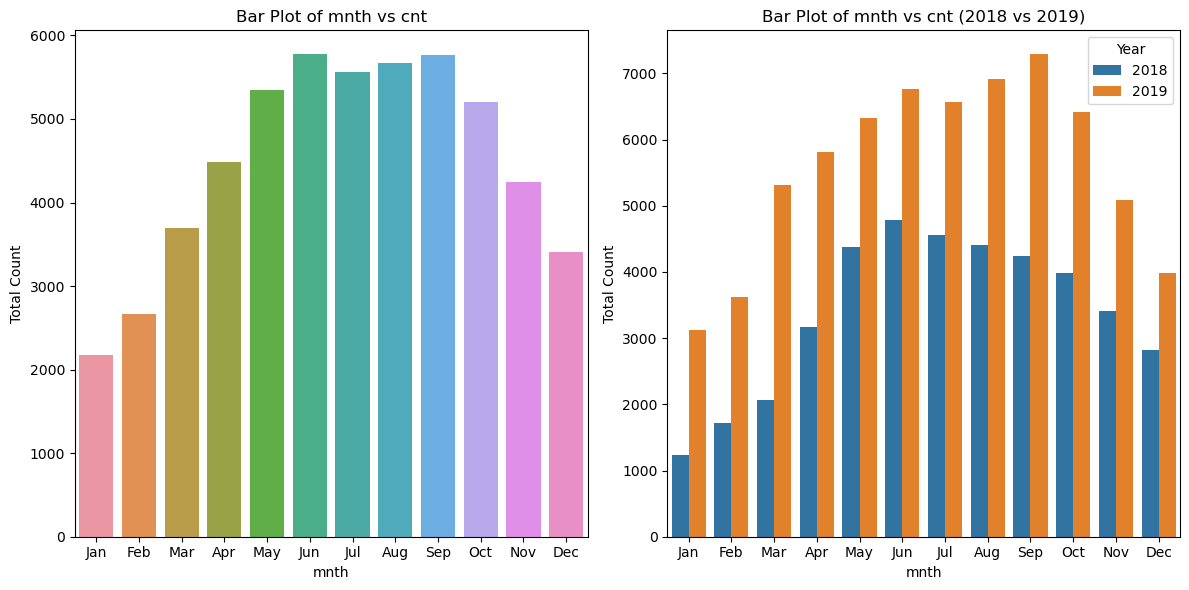

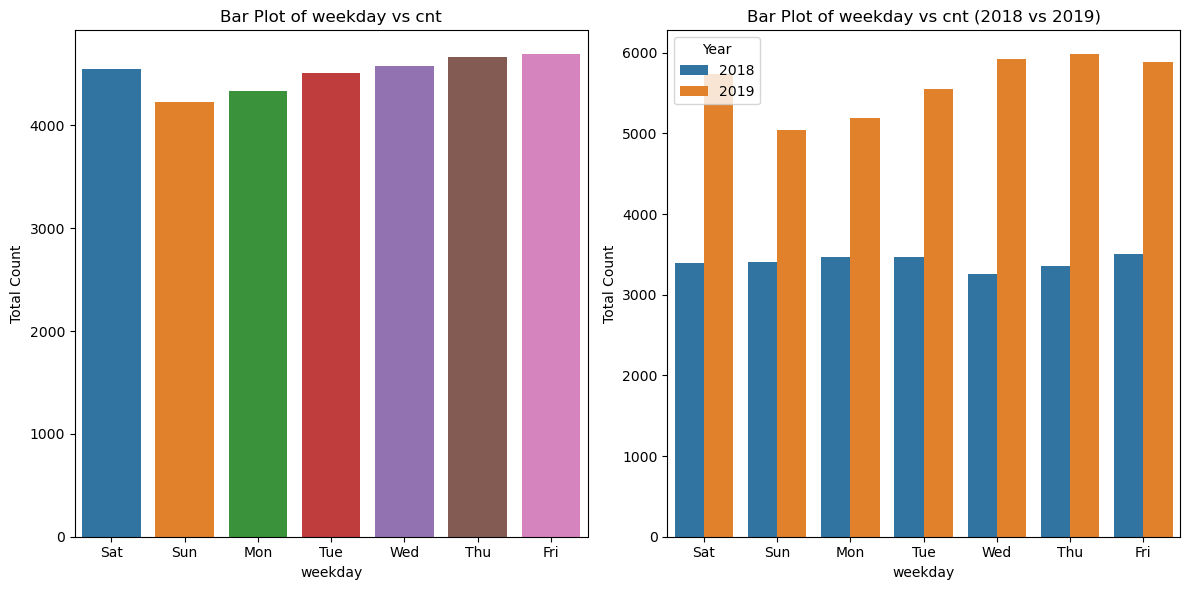

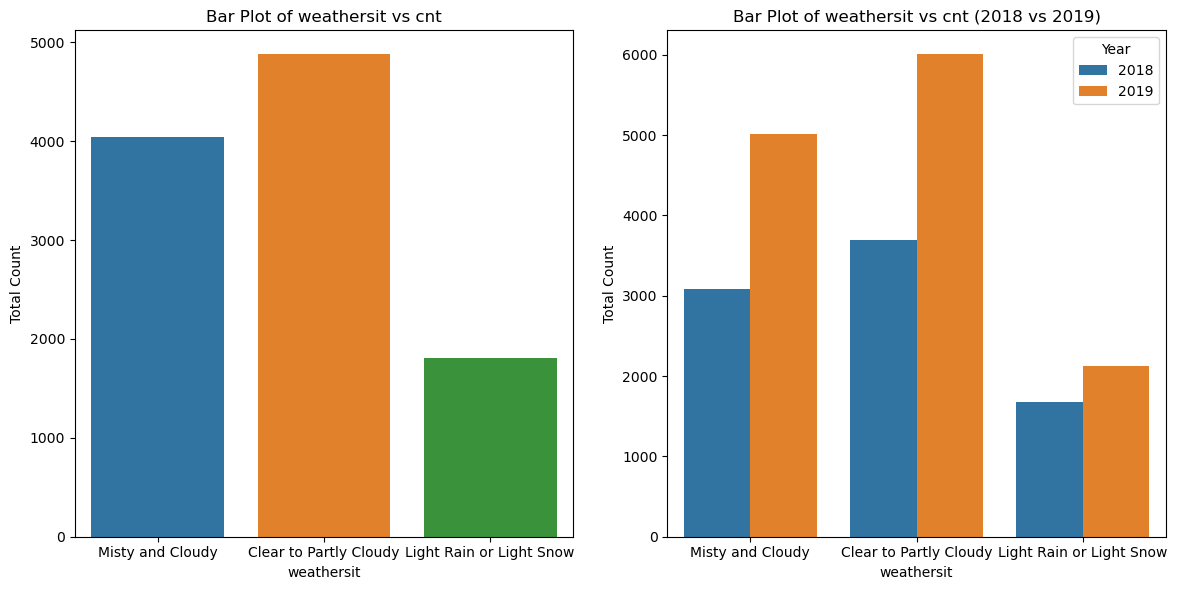

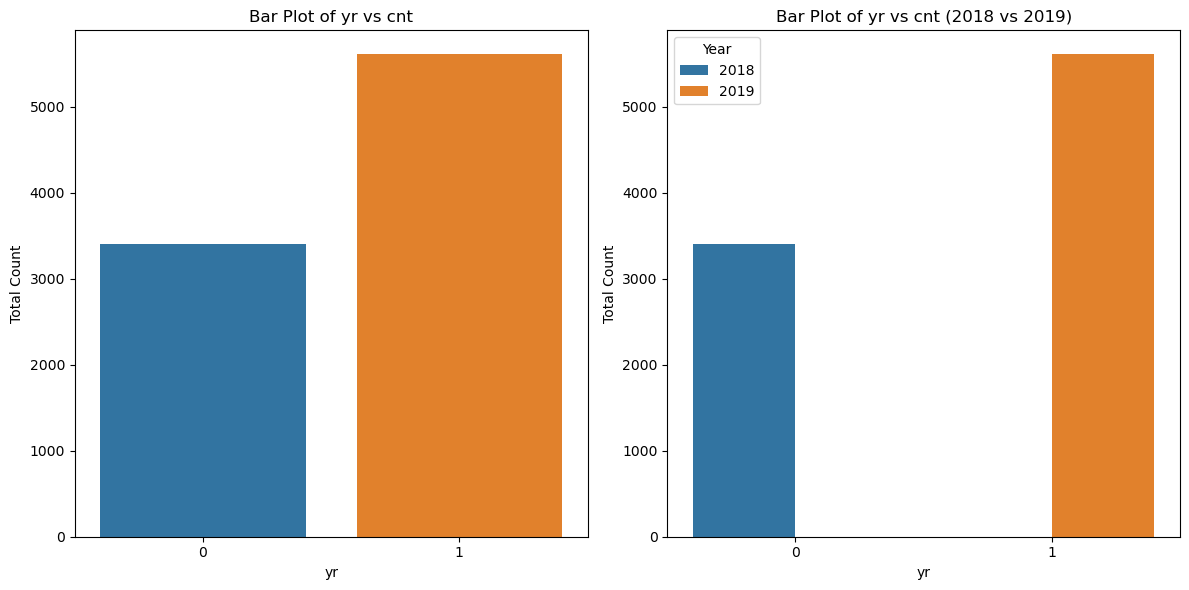

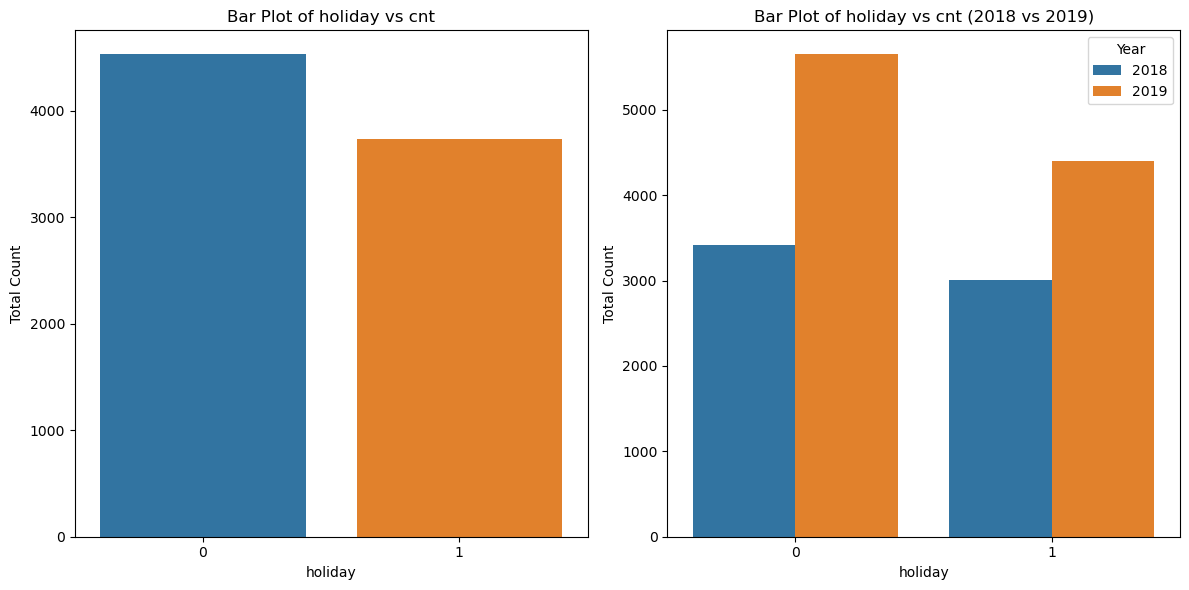

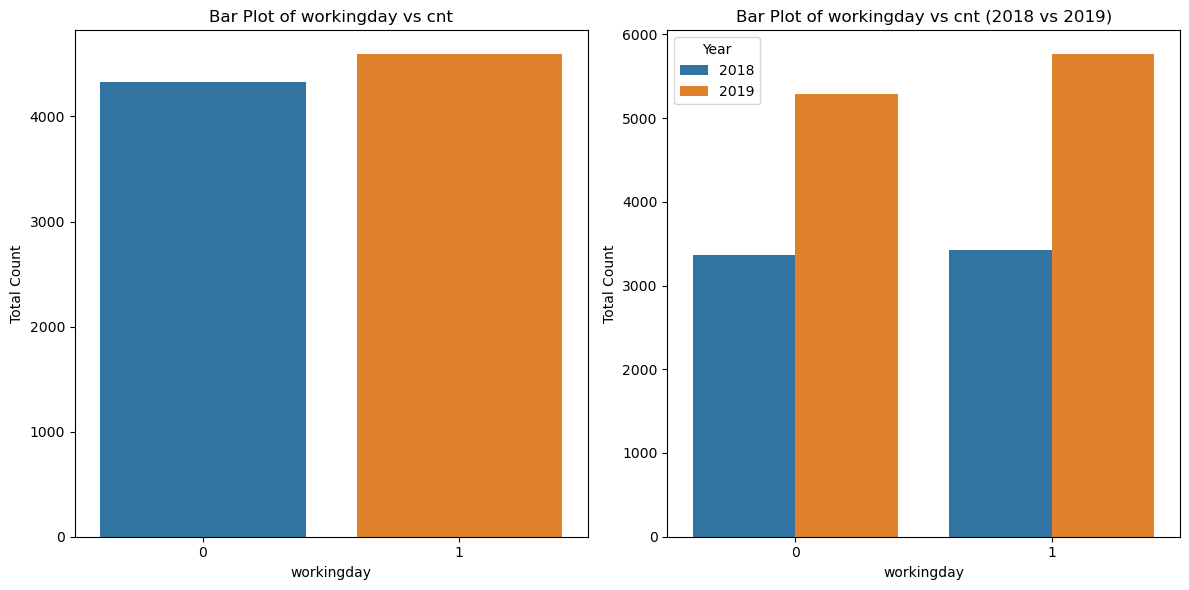

In [34]:
for i in cat_var:
    # Calling the plot_bar_graphs function 
    plot_bar_graphs(i)

##### Observations:

1. **Season**:
    The fall season sees the highest number of bike rentals.
    In 2019, bike rentals increased across all seasons compared to 2018.
    
2. **Month**:
    From May to October, there are more bike registrations.
    In 2019, bike registrations rose for each month compared to 2018.

3. **Weather Situation**:
    People are more likely to rent bikes when the weather is favorable.
    In 2019, bike registrations increased across all weather conditions compared to 2018.
    
4. **Holiday**:
    People tend to avoid renting bikes on holidays.

### Data Preparation for Model Building

In [35]:
# Checking the data types
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [36]:
# All the columns with Object data types are categorical, hence changing those to categorical
bike = bike.apply(lambda col: col.astype('category') if col.dtype == 'object' else col)

In [37]:
# Extracting the categorical variables in a separate df
categorical_columns = bike.select_dtypes(include=['category']).columns

In [38]:
# Listing categorical Variables
categorical_columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [39]:
# Convert categorical variable 'weathersit' into dummy variables
weathersit_d = pd.get_dummies(bike['weathersit'], prefix = 'weathersit', drop_first=True).astype('int64')

In [40]:
weathersit_d

,weathersit_Light Rain or Light Snow,weathersit_Misty and Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [41]:
# Converting 'weekday' to dummy variables
weekday_d = pd.get_dummies(bike['weekday'], prefix='weekday', drop_first=True).astype('int64')

In [42]:
# Convert 'mnth' to dummy variables
mnth_d = pd.get_dummies(bike['mnth'], prefix='mnth', drop_first=True).astype('int64')

In [43]:
# Convert 'season' to dummy variables
season_d = pd.get_dummies(bike['season'], prefix='season', drop_first=True).astype('int64')

In [44]:
# Adding the dummy variables to original DataFrame
bike = pd.concat([bike, season_d, mnth_d, weekday_d, weathersit_d], axis=1)

In [45]:
columns_to_drop  = ['season', 'mnth', 'weekday', 'weathersit']
bike = bike.drop(columns = columns_to_drop,axis=1)

In [46]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain or Light Snow,weathersit_Misty and Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   yr                                   730 non-null    int64  
 1   holiday                              730 non-null    int64  
 2   workingday                           730 non-null    int64  
 3   temp                                 730 non-null    float64
 4   atemp                                730 non-null    float64
 5   hum                                  730 non-null    float64
 6   windspeed                            730 non-null    float64
 7   cnt                                  730 non-null    int64  
 8   season_Spring                        730 non-null    int64  
 9   season_Summer                        730 non-null    int64  
 10  season_Winter                        730 non-null    int64  
 11  mnth_Aug                        

##### Train and Test data preparation

In [48]:
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size=0.70, test_size=0.30, random_state=100)

In [49]:
print(f'Training set:{df_train.shape}')
print(f'Test set:{df_test.shape}')

Training set:(510, 30)
Test set:(219, 30)


##### Scaling the Numerical Values

In [50]:
#Scaling the Numeric Variables for training data using MinMaxScalor between 0-1
num_vars =  ['temp', 'atemp', 'hum', 'windspeed','cnt']
scaler=MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [51]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain or Light Snow,weathersit_Misty and Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [52]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain or Light Snow,weathersit_Misty and Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Training Data Splitting

In [53]:
y_train = df_train.pop('cnt')
X_train = df_train

### Model Development

#### 1st  Model:

In [54]:
# Building a model with all features using statsmodels.OLS :
X_train_lm = sm.add_constant(X_train)
lm1= sm.OLS(y_train, X_train_lm).fit()
lm1.params

const                                  0.245237
yr                                     0.232208
holiday                                0.010689
workingday                             0.096962
temp                                   0.401322
atemp                                  0.050628
hum                                   -0.151812
windspeed                             -0.184388
season_Spring                         -0.048580
season_Summer                          0.038216
season_Winter                          0.105387
mnth_Aug                               0.016076
mnth_Dec                              -0.045572
mnth_Feb                              -0.032176
mnth_Jan                              -0.062565
mnth_Jul                              -0.039277
mnth_Jun                              -0.001704
mnth_Mar                               0.001288
mnth_May                               0.024691
mnth_Nov                              -0.041783
mnth_Oct                               0

In [55]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          8.42e-181
Time:                        19:01:45   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.2452      0.035      6.953      0.000       0.176       0.315
yr                                      0.2322      0.008     28.792      0.000       0.216       0.248
holiday                                 0.0107      0.024      0.443      0.658      -0.037       0.058
workingday                              0.0970      0.012      7.903      0.000       0.073       0.121
temp                                    0.4013      0.142      2.821      0.005       0.122       0.681
atemp                                   0.0506      0.138      0.366      0.714      -0.221       0.322
hum                                    -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed                              -0.1844      0.026     -7.003      0.000      -0.236      -0.133
season_Spring                          -0.0486      0.030     -1.618      0.106      -0.108       0.010
season_Summer                           0.0382      0.026      1.455      0.146      -0.013       0.090
season_Winter                           0.1054      0.028      3.770      0.000       0.050       0.160
mnth_Aug                                0.0161      0.034      0.473      0.637      -0.051       0.083
mnth_Dec                               -0.0456      0.034     -1.356      0.176      -0.112       0.020
mnth_Feb                               -0.0322      0.033     -0.978      0.329      -0.097       0.032
mnth_Jan                               -0.0626      0.034     -1.864      0.063      -0.129       0.003
mnth_Jul                               -0.0393      0.035     -1.116      0.265      -0.108       0.030
mnth_Jun                               -0.0017      0.025     -0.067      0.946      -0.051       0.048
mnth_Mar                                0.0013      0.025      0.052      0.958      -0.047       0.050
mnth_May                                0.0247      0.021      1.169      0.243      -0.017       0.066
mnth_Nov                               -0.0418      0.036     -1.149      0.251      -0.113       0.030
mnth_Oct                                0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_Sep                                0.0818      0.032      2.549      0.011       0.019       0.145
weekday_Mon                            -0.0215      0.015     -1.395      0.164      -0.052       0.009
weekday_Sat                             0.0961      0.014      6.984      0.000       0.069       0.123
weekday_Sun                             0.0415      0.014      2.974      0.003       0.014       0.069
weekday_Thu                            -0.0097      0.016     -0.625      0.532      -0.040       0.021
weekday_Tue                            -0.0193      0.016     -1.24

##### Observation:

1. The adjusted R-squared value of 0.845 is quite strong. Let's explore the possibility of reducing the number of independent features.

2. Given that there are about 30 predictor variables, manually removing insignificant ones may not be practical. Therefore, we will employ a hybrid approach (combining RFE with manual selection) to eliminate insignificant variables.

#### Recursive Feature Elimination (RFE)

The code snippet given below trains a linear regression model (lm) using the training data (X_train, y_train) and then utilizes Recursive Feature Elimination (RFE) to identify the top 15 features for the model.

In [56]:
# Training a linear regression model using the training data.
lm = LinearRegression()
lm.fit(X_train, y_train)

# Use Recursive Feature Elimination (RFE) to identify the top 15 features.
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [57]:
#Observations: 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 13),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 5),
 ('mnth_Mar', False, 9),
 ('mnth_May', False, 15),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 14),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 10),
 ('weathersit_Light Rain or Light Snow', True, 1),
 ('weathersit_Misty and Cloudy', True, 1)]

In [58]:
# RFE support Variables
col = X_train.columns[rfe.support_]
print(len(col))
print(col)

15
Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Sat',
       'weathersit_Light Rain or Light Snow', 'weathersit_Misty and Cloudy'],
      dtype='object')


In [59]:
# RFE not Supported Variables
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [60]:
# Function to calculate Variance Inflation Factor (VIF) 
def calculateVIF(df):
    vif = pd.DataFrame()

    vif['Features'] = df.columns

    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    vif['VIF'] = round(vif['VIF'], 2)

    vif = vif.sort_values(by="VIF", ascending=False)

    return vif

In [61]:
# Considering RFE Supported Columns
X_train_1 = X_train[col]

#### 2nd Model

In [62]:
X_train_lm2 = sm.add_constant(X_train_1)

# Create a first fitted model
lm2 = sm.OLS(y_train, X_train_lm2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          2.31e-191
Time:                        19:02:01   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.2510      0.036      6.949      0.000       0.180       0.322
yr                                      0.2305      0.008     28.807      0.000       0.215       0.246
holiday                                -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday                              0.0435      0.012      3.781      0.000       0.021       0.066
temp                                    0.5098      0.034     14.851      0.000       0.442       0.577
hum                                    -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed                              -0.1860      0.025     -7.301      0.000      -0.236      -0.136
season_Spring                          -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_Summer                           0.0497      0.015      3.346      0.001       0.020       0.079
season_Winter                           0.0944      0.017      5.479      0.000       0.061       0.128
mnth_Jan                               -0.0343      0.017     -1.980      0.048      -0.068      -0.000
mnth_Jul                               -0.0532      0.018     -2.947      0.003      -0.089      -0.018
mnth_Sep                                0.0812      0.016      4.934      0.000       0.049       0.114
weekday_Sat                             0.0537      0.014      3.707      0.000       0.025       0.082
weathersit_Light Rain or Light Snow    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
weathersit_Misty and Cloudy            -0.0578      0.010     -5.574      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
calculateVIF(X_train_1)

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_Spring,4.53
8,season_Winter,3.48
7,season_Summer,2.84
14,weathersit_Misty and Cloudy,2.29
0,yr,2.09
12,weekday_Sat,1.98


In [64]:
#From above VIF table we can see that hum vifis 29.4 value which is high, so removing this feature

X_train_2 = X_train_1.drop(["hum"], axis = 1)
X_train_2.head()

,yr,holiday,workingday,temp,windspeed,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Sat,weathersit_Light Rain or Light Snow,weathersit_Misty and Cloudy
653,1,0,1,0.509887,0.300794,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.255342,1,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.188475,0,1,0,0,0,0,1,0,1


#### 3rd Model

In [65]:
X_train_lm3 = sm.add_constant(X_train_2)

# Create a first fitted model
lm3 = sm.OLS(y_train, X_train_lm3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          7.33e-189
Time:                        19:02:08   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.1737      0.031      5.525      0.000       0.112       0.235
yr                                      0.2344      0.008     29.019      0.000       0.218       0.250
holiday                                -0.0562      0.027     -2.058      0.040      -0.110      -0.003
workingday                              0.0465      0.012      3.983      0.000       0.024       0.069
temp                                    0.4728      0.034     14.037      0.000       0.407       0.539
windspeed                              -0.1563      0.025     -6.292      0.000      -0.205      -0.107
season_Spring                          -0.0597      0.021     -2.861      0.004      -0.101      -0.019
season_Summer                           0.0434      0.015      2.890      0.004       0.014       0.073
season_Winter                           0.0797      0.017      4.650      0.000       0.046       0.113
mnth_Jan                               -0.0389      0.018     -2.215      0.027      -0.073      -0.004
mnth_Jul                               -0.0482      0.018     -2.635      0.009      -0.084      -0.012
mnth_Sep                                0.0753      0.017      4.522      0.000       0.043       0.108
weekday_Sat                             0.0584      0.015      3.980      0.000       0.030       0.087
weathersit_Light Rain or Light Snow    -0.2917      0.024    -12.027      0.000      -0.339      -0.244
weathersit_Misty and Cloudy            -0.0826      0.009     -9.592      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
calculateVIF(X_train_2)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,season_Spring,3.08
6,season_Summer,2.33
0,yr,2.08
7,season_Winter,1.99
11,weekday_Sat,1.97
8,mnth_Jan,1.62
9,mnth_Jul,1.59


In [67]:
# Temp have VIF>5 (7.07) hence dropping this feature
bike.head(5)
X_train_3 = X_train_2.drop(["temp"], axis = 1)
X_train_3.head()

,yr,holiday,workingday,windspeed,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Sat,weathersit_Light Rain or Light Snow,weathersit_Misty and Cloudy
653,1,0,1,0.300794,0,0,1,0,0,0,0,0,0
576,1,0,1,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.255342,1,0,0,0,0,0,1,0,1
728,1,0,0,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.188475,0,1,0,0,0,0,1,0,1


##### Observation
**We can infer from the Model Summary Report that all of the features have p value under 0.05**


#### 4th Model

In [68]:
X_train_lm4 = sm.add_constant(X_train_3)

# Create a first fitted model
lm4 = sm.OLS(y_train, X_train_lm4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          4.04e-154
Time:                        19:02:19   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.5448      0.020     27.136      0.000       0.505       0.584
yr                                      0.2478      0.009     26.156      0.000       0.229       0.266
holiday                                -0.0571      0.032     -1.771      0.077      -0.120       0.006
workingday                              0.0480      0.014      3.482      0.001       0.021       0.075
windspeed                              -0.1878      0.029     -6.429      0.000      -0.245      -0.130
season_Spring                          -0.2603      0.018    -14.490      0.000      -0.296      -0.225
season_Summer                          -0.0440      0.016     -2.729      0.007      -0.076      -0.012
season_Winter                          -0.0749      0.016     -4.829      0.000      -0.105      -0.044
mnth_Jan                               -0.1024      0.020     -5.104      0.000      -0.142      -0.063
mnth_Jul                               -0.0099      0.021     -0.461      0.645      -0.052       0.032
mnth_Sep                                0.0708      0.020      3.601      0.000       0.032       0.109
weekday_Sat                             0.0564      0.017      3.252      0.001       0.022       0.090
weathersit_Light Rain or Light Snow    -0.3045      0.029    -10.634      0.000      -0.361      -0.248
weathersit_Misty and Cloudy            -0.0896      0.010     -8.824      0.000      -0.110      -0.070
==============================================================================
Omnibus:                       34.622   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.832
Skew:                          -0.419   Prob(JB):                     3.07e-15
Kurtosis:                       4.563   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
calculateVIF(X_train_3)

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
4,season_Spring,2.97
5,season_Summer,2.27
6,season_Winter,1.99
0,yr,1.91
10,weekday_Sat,1.69
7,mnth_Jan,1.60
12,weathersit_Misty and Cloudy,1.56
8,mnth_Jul,1.30


In [70]:
# We can see that p value for mnth_Jul is very high, hence dropping this.

X_train_4 = X_train_3.drop(["mnth_Jul"], axis = 1)
X_train_4.head()

,yr,holiday,workingday,windspeed,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Sep,weekday_Sat,weathersit_Light Rain or Light Snow,weathersit_Misty and Cloudy
653,1,0,1,0.300794,0,0,1,0,0,0,0,0
576,1,0,1,0.264686,0,0,0,0,0,0,0,0
426,1,0,0,0.255342,1,0,0,0,0,1,0,1
728,1,0,0,0.663106,1,0,0,0,0,0,0,0
482,1,0,0,0.188475,0,1,0,0,0,1,0,1


#### Observation
**We can see that in Model 4 (after removing temp as feature) the adjusted R Squared got impacted: from 0.843 to 0.781.
So we can consider our Model 3 as the Final Model**

### Confirming Linear Regression Assumptions
#### Residual Analysis

In [71]:
# Lets perform Residual Analysis
y_train_pred = lm3.predict(X_train_lm3)
residual = y_train - y_train_pred


**The code given below creates a visual depiction of the residual analysis for a regression model**


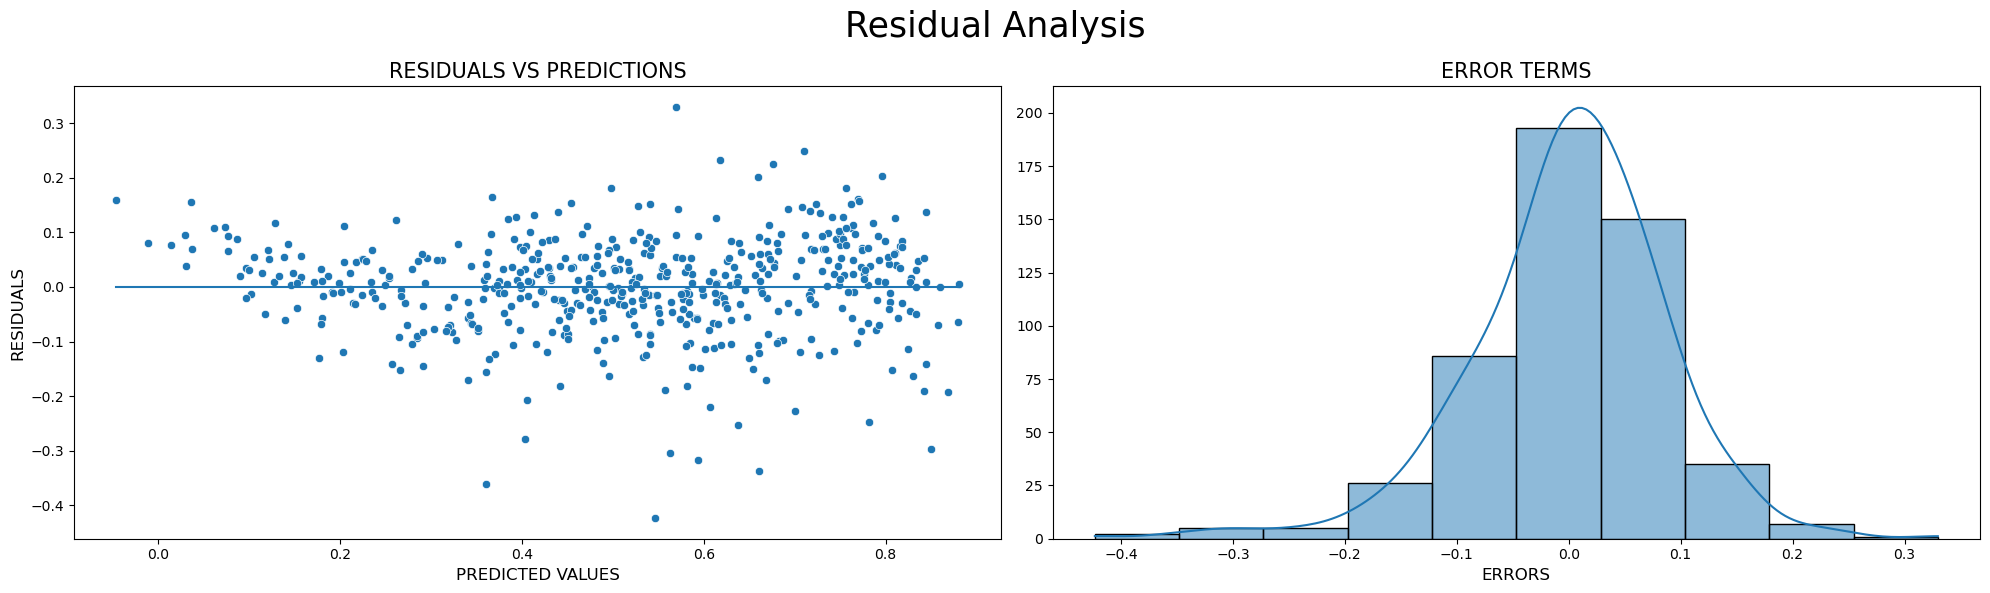

In [72]:
# Visualize residual analysis
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
plt.suptitle('Residual Analysis', fontsize=25)

# Scatter plot of residuals vs predictions
sns.scatterplot(y=residual.values, x= y_train_pred.values, ax=ax[0])
sns.lineplot(y= residual.mean(),x=y_train_pred.values, ax=ax[0])  # Add a horizontal line at the mean of residuals

ax[0].set_title('Residuals vs Predictions'.upper(), fontsize=15)
ax[0].set_ylabel('Residuals'.upper(), fontsize=12)
ax[0].set_xlabel('Predicted Values'.upper(), fontsize=12)

# Histogram of error terms
sns.histplot(residual, kde=True, bins=10, ax=ax[1])

ax[1].set_title('Error Terms'.upper(), fontsize=15)
ax[1].set_ylabel('')
ax[1].set_xlabel('Errors'.upper(), fontsize=12)

plt.tight_layout()
plt.show()

##### Observations:
**Normality of Residuals**

1. The average of the residuals is very close to 0.
2. The errors are normally distributed around a mean of 0.

**Independence of Errors**

In [73]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson_stat = durbin_watson(residual)
print(durbin_watson_stat)

2.0655368235649236


**Homoscedasticity**

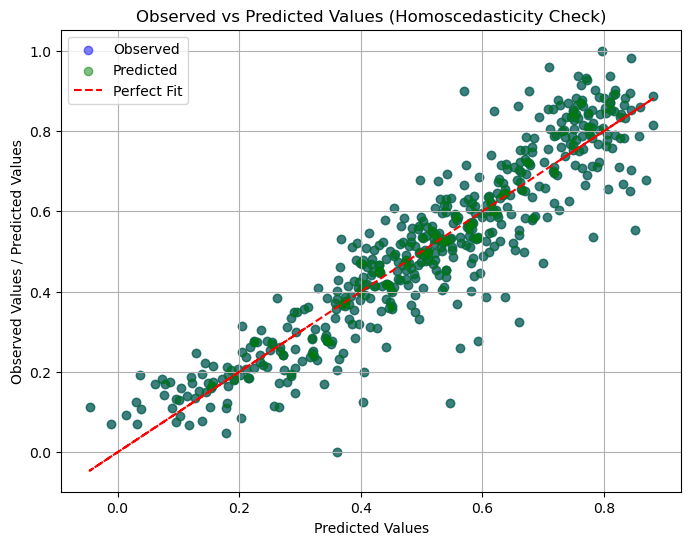

In [74]:
# Assume that y_train and y_train_pred are the actual and predicted target values respectively
residuals = y_train - y_train_pred


plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, y_train, color='blue', label='Observed', alpha=0.5)
plt.scatter(y_train_pred, y_train_pred + residuals, color='green', label='Predicted', alpha=0.5)
plt.plot(y_train_pred, y_train_pred, color='red', linestyle='--', label='Perfect Fit')  # Add a perfect fit line
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values / Predicted Values')
plt.title('Observed vs Predicted Values (Homoscedasticity Check)')
plt.legend()
plt.grid(True)
plt.show()

##### Observation:

**The plot above indicates a nearly constant variance in the predictions, which supports the assumption of homoscedasticity for the errors**

### Predictions using Model

In [75]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain or Light Snow,weathersit_Misty and Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,20.815737,24.255828,61.961883,12.600130,4546.981735,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,7.689600,8.299641,14.456669,4.984858,1898.633630,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.093750,17.085500,51.166700,9.021282,3303.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.807500,24.873150,60.916700,12.167200,4579.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.401653,31.155725,72.192050,15.395629,5869.500000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
#creating list of numeric columns which are not yet scalled
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [77]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain or Light Snow,weathersit_Misty and Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Splitting the data into X_test and y_test

In [78]:
y_test = df_test.pop('cnt')
X_test = df_test

In [79]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Rain or Light Snow,weathersit_Misty and Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


####  Actual Predictions

In [80]:
X_test=X_test[X_train_2.columns]  #as our final trained model is model 3 where trained data is X_train_2 and model is lm3
# Adding constant variable to test dataframe
X_test_lm3 = sm.add_constant(X_test)
X_test_lm3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   const                                219 non-null    float64
 1   yr                                   219 non-null    int64  
 2   holiday                              219 non-null    int64  
 3   workingday                           219 non-null    int64  
 4   temp                                 219 non-null    float64
 5   windspeed                            219 non-null    float64
 6   season_Spring                        219 non-null    int64  
 7   season_Summer                        219 non-null    int64  
 8   season_Winter                        219 non-null    int64  
 9   mnth_Jan                             219 non-null    int64  
 10  mnth_Jul                             219 non-null    int64  
 11  mnth_Sep                            

In [81]:
# Predict on the test data
y_test_pred = lm3.predict(X_test_lm3)

Text(0, 0.5, 'y_test_pred')

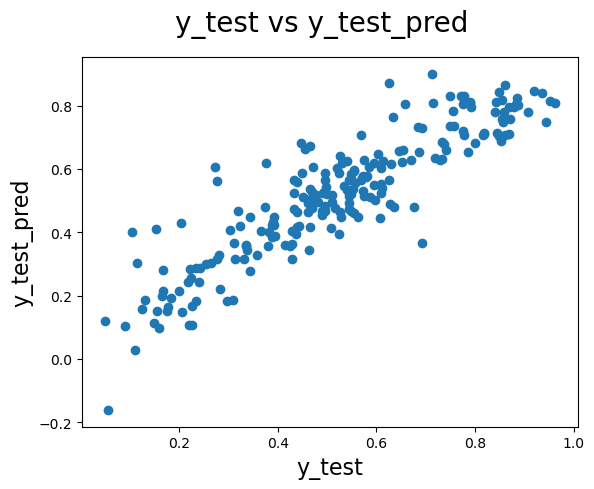

In [82]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=16)                              # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [83]:
# Calculate R-squared on the training data
r_squared_train = round(r2_score(y_train, y_train_pred),3)
print(f"Training R-squared: {r_squared_train}")

# Calculate Adjusted R-squared on the training data
adjusted_r_squared = round(lm5.rsquared_adj,3)
print(f"Training Adjusted R-squared: {adjusted_r_squared}")

# Calculate R-squared on the test data
r_squared_test = round(r2_score(y_test, y_test_pred),3)
print(f"Test R-squared: {r_squared_test}")

# Calculate Adjusted R-squared on the test data
n_test = X_test.shape[0]
k = X_test.shape[1]
adjusted_r_squared_test = 1 - ((1 - r_squared_test) * (n_test - 1) / (n_test - k - 1))

print(f"Test Adjusted R-squared: {adjusted_r_squared_test:.3f}")

Training R-squared: 0.843


NameError: name 'lm5' is not defined

In [84]:
print(lm3.params.round(3).sort_values(ascending=False))

temp                                   0.473
yr                                     0.234
const                                  0.174
season_Winter                          0.080
mnth_Sep                               0.075
weekday_Sat                            0.058
workingday                             0.047
season_Summer                          0.043
mnth_Jan                              -0.039
mnth_Jul                              -0.048
holiday                               -0.056
season_Spring                         -0.060
weathersit_Misty and Cloudy           -0.083
windspeed                             -0.156
weathersit_Light Rain or Light Snow   -0.292
dtype: float64


In [85]:
# Get the model parameters
params = lm3.params.round(3)

# Construct the regression equation
equation = "cnt = "

# Add the intercept
equation += f"{params['const']}"

# Add the rest of the coefficients
for feature, coef in params.items():
    if feature != 'const':
        sign = " + " if coef >= 0 else " - "
        equation += f"{sign}({abs(coef)}* {feature})"

print(equation)

cnt = 0.174 + (0.234* yr) - (0.056* holiday) + (0.047* workingday) + (0.473* temp) - (0.156* windspeed) - (0.06* season_Spring) + (0.043* season_Summer) + (0.08* season_Winter) - (0.039* mnth_Jan) - (0.048* mnth_Jul) + (0.075* mnth_Sep) + (0.058* weekday_Sat) - (0.292* weathersit_Light Rain or Light Snow) - (0.083* weathersit_Misty and Cloudy)


In [86]:
#Defining a function to find top 'n' featured
def nImportantFeatures(series, n):
    series = series.sort_values(key = lambda x: abs(x), ascending = False)
    return series.head(n)

In [87]:
#Identifying all features in decreasing order of importance/relevance
parameter_series = pd.Series(params)
descending_importance = nImportantFeatures(parameter_series, len(parameter_series))
descending_importance

temp                                   0.473
weathersit_Light Rain or Light Snow   -0.292
yr                                     0.234
const                                  0.174
windspeed                             -0.156
weathersit_Misty and Cloudy           -0.083
season_Winter                          0.080
mnth_Sep                               0.075
season_Spring                         -0.060
weekday_Sat                            0.058
holiday                               -0.056
mnth_Jul                              -0.048
workingday                             0.047
season_Summer                          0.043
mnth_Jan                              -0.039
dtype: float64